# 1. Sarsa Algorithm and the Windy Grid World Enviroment

__In this notebook, we are going to tackle the windy grid world environment with the Sarsa algorithm.__

## What is the Windy Grid World Environment?
Windy Gridworld as shown below is a standard gridworld, with start and goal states, but with one difference: there is a crosswind running upward through the middle of the grid. The actions are the standard four—up, down, right, and left—but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the right of the goal, then the action left takes you to the cell just above the goal. The optimal path should look like this. (Why?)

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/windygrid_actual.png" width=400>
<table style="background-color: white; align: center; text-align: center;">
    <tr>
        <td style="text-align: center;">
            <h3>Start State</h3>
        </td>
        <td>
        </td>
        <td style="text-align: center;">
            <h3>Final State</h3>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world.png" width=300>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/arrow.jpeg" width=20>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world_end.png" width=300>
        </td>
    </tr>
</table>

----

In [1]:
# PLEASE RUN ME!
# INSTALLATIONS
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.done'):
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/python_Exercise/master/Colab_setup/setup_colab.sh -O- | bash
    !pip -q install gym
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/agents.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/envs.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/train.py
    !touch .done

# Creating a virtual display to draw game images on.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

## Let's see how a random agent acts (50 random steps)

(63.0, -1, False)


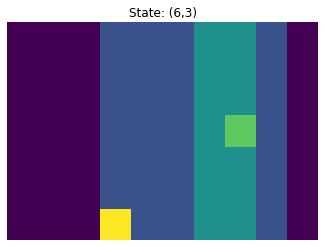

In [2]:
from envs import WindyGridWorld
from time import sleep
import numpy as np
from IPython.display import clear_output

%matplotlib inline
env = WindyGridWorld()

for i in range(50):
    a = np.random.choice([0,1,2,3])
    print(env.step(a))
    env.render()
    sleep(0.1)
    clear_output(wait=True)

## Training a Sarsa Agent for the Windy Grid World

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/SARSA_algorithm.png" width=800>

__Notice that as the training progresses, the agent gets less negative reward, and manages to finish the task sooner.__

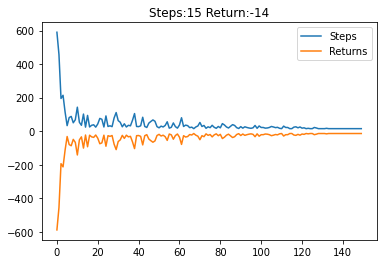

In [3]:
from envs import WindyGridWorld
from agents import Sarsa_Agent
from train import train_windygridworld, play

env = WindyGridWorld()
agent = Sarsa_Agent(env.states_n, env.actions_n,epsilon_decay=True)

train_windygridworld(env, agent, 150)

## Watch a Smart Agent:

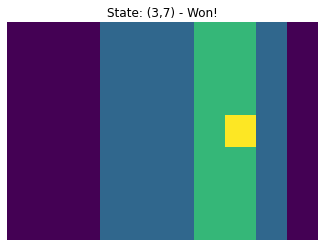

Done in 15 steps.
Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 0]
right, right, right, right, right, right, right, right, right, down, down, down, down, left, left, right, 


In [4]:
play(env, agent, episodes=2)

# How the learning happened?

The Sarsa agent is implementing a tabular method which means that it's updating a table of values iteratively. This table is called Q-table. After the training the agent knows exactly which actions are the best in almost all possible states.

## Here's its Q-table:

In [5]:
agent.Q

array([[ -9.74100321,  -9.9861229 ,  -9.71824944,  -9.70276191],
       [ -9.48488768,  -9.69157759,  -9.54845443,  -9.35255039],
       [ -9.14411402,  -9.13143525,  -9.35974403,  -9.25961058],
       [ -8.62297466,  -8.66551772,  -8.9165738 ,  -8.70705767],
       [ -8.02526098,  -8.10557828,  -8.17131893,  -8.44247613],
       [ -7.39501181,  -7.50260643,  -7.73233302,  -7.61373066],
       [ -6.73159137,  -6.89730487,  -6.86744172,  -6.97743199],
       [ -6.03325408,  -6.10598887,  -6.2472238 ,  -6.52027853],
       [ -5.29816219,  -5.57415832,  -5.49595151,  -5.30873832],
       [ -4.55304586,  -4.57178161,  -4.90989461,  -4.52438125],
       [ -9.71159529,  -9.79220237,  -9.79591501,  -9.66293937],
       [ -9.49562673,  -9.50455948,  -9.44678773,  -9.63497928],
       [ -9.07352706,  -9.37405099,  -9.31009713,  -9.23386628],
       [ -8.61188449,  -8.77106975,  -8.86651426,  -8.94290608],
       [ -8.02517551,  -8.29285654,  -8.05423294,  -8.19528537],
       [ -7.39501181,  -7

# 2. Sarsa Algorithm and the Taxi Environment

The Smartcab's job is to pick up the passenger in a simplified gridworld like environment at one location and drop them off in another. Here are a few things that we'd love our Smartcab to take care of:

- Drop off the passenger to the right location.
- Save passenger's time by taking minimum time possible to drop off
- Take care of passenger's safety and traffic rules

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Taxi_Env.png" width=400>

__State__: Let's say we have a training area for our Smartcab where we are teaching it to transport people in a parking lot to four different locations (R, G, Y, B):

Let's assume Smartcab is the only vehicle in this parking lot. We can break up the parking lot into a 5x5 grid, which gives us 25 possible taxi locations. These 25 locations are one part of our state space. Notice the current location state of our taxi is coordinate (3, 1).

You'll also notice there are four (4) locations that we can pick up and drop off a passenger: R, G, Y, B or `[(0,0), (0,4), (4,0), (4,3)]` in (row, col) coordinates. Our illustrated passenger is in location Y and they wish to go to location R.

__Actions__: The agent is allowed to perform six possible actions:

1. south
2. north
3. east
4. west
5. pickup
6. dropoff

Notice in the illustration above, that the taxi cannot perform certain actions in certain states due to walls. In environment's code, we will simply provide a -1 penalty for every wall hit and the taxi won't move anywhere. This will just rack up penalties causing the taxi to consider going around the wall.

## Let's train our agent for 1500 episodes (takes ~5 minutes):

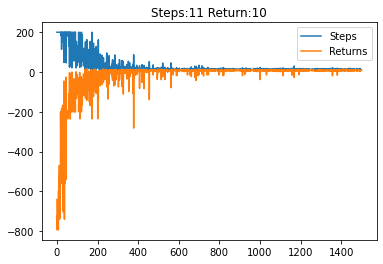

In [6]:
import gym

# Finding the Taxi environment
for env in gym.envs.registry.all():
    if env.id.startswith("Taxi"):
        env_name = env.id
##
from agents import Sarsa_Agent
from train import train_gym, play_taxi

env = gym.make(env_name)
agent = Sarsa_Agent(env.observation_space.n, env.action_space.n,epsilon_decay=True)

train_gym(env, agent, 1500)

Notice that as the learning progresses the agent collects more rewards (returns) in a shorter time.

## Watch a smart self-driving cab:
_Note: You can change the number of `passengers` if you want to move more than 5. Change the `wait_btw_frames` if you want to see the game running faster or slower._

In [8]:
play_taxi(env, agent, passengers=3, wait_btw_frames=1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Passenger #: 3
-----------
Timestep: 16
State: 97
Action: 5
Reward: 20


## Conclusion:

Reinforcement algorithms are the closest approaches to General Intelligence. Notice that we used the same algorithms on two completely different environments, and in both an optimal solution converged.